# Employee Skills Clustering Based on Skill Composition

This notebook creates a clustering model that groups employees based on their **skill composition** (the pattern of skills), not their overall skill level.

## Approach:
1. Extract only skill columns (exclude personality traits and role)
2. Apply row-wise normalization to focus on skill patterns
3. Use K-Means clustering
4. Identify top skills per cluster and assign meaningful names

## 1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:

data_path = '../Data/CareerMap- Mapping Tech Roles With Personality & Skills.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (9179, 28)

First few rows:


,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,6,4,4,4,4,4,4,4,4,4,...,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,6,5,4,4,4,4,4,4,4,4,...,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,6,1,4,4,4,4,4,4,4,4,...,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,6,0,4,4,4,4,4,4,4,4,...,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,6,3,4,4,4,4,4,4,4,4,...,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


## 2. Extract Skill Columns

We'll identify and extract only the skill columns, excluding personality traits and the role column.

In [ ]:

personality_traits = [
    'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness', 
    'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism', 
    'Self-enhancement', 'Self-transcendence'
]
all_columns = df.columns.tolist()

skill_columns = [col for col in all_columns if col not in personality_traits + ['Role']]

print(f"Total columns: {len(all_columns)}")
print(f"Skill columns: {len(skill_columns)}")
print(f"\nSkill columns:")
for i, skill in enumerate(skill_columns, 1):
    print(f"{i:2d}. {skill}")

Total columns: 28
Skill columns: 17

Skill columns:
 1. Database Fundamentals
 2. Computer Architecture
 3. Distributed Computing Systems
 4. Cyber Security
 5. Networking
 6. Software Development
 7. Programming Skills
 8. Project Management
 9. Computer Forensics Fundamentals
10. Technical Communication
11. AI ML
12. Software Engineering
13. Business Analysis
14. Communication skills
15. Data Science
16. Troubleshooting skills
17. Graphics Designing


In [ ]:

skill_data = df[skill_columns].copy()

print(f"Skill data shape: {skill_data.shape}")
print(f"\nBasic statistics:")
skill_data.describe()

Skill data shape: (9179, 17)

Basic statistics:


,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing
count,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000
mean,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705850
std,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## 3. Row-Wise Normalization

Apply StandardScaler to each row independently. This transforms each employee's skills relative to their own profile, ensuring we focus on **skill composition** rather than absolute skill levels.

In [ ]:

skill_matrix = skill_data.values

skill_normalized = np.zeros_like(skill_matrix, dtype=float)

for i in range(skill_matrix.shape[0]):
    row = skill_matrix[i, :]
    row_mean = np.mean(row)
    row_std = np.std(row)
    
    if row_std > 0:
        skill_normalized[i, :] = (row - row_mean) / row_std
    else:
        skill_normalized[i, :] = row - row_mean

print(f"Normalized skill matrix shape: {skill_normalized.shape}")
print(f"\nExample: First employee's skills before and after normalization:")
print(f"Before: {skill_matrix[0, :]}")
print(f"After:  {skill_normalized[0, :]}")

Normalized skill matrix shape: (9179, 17)

Example: First employee's skills before and after normalization:
Before: [6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
After:  [ 4.   -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25
 -0.25 -0.25 -0.25 -0.25 -0.25]


In [ ]:

skill_normalized_df = pd.DataFrame(skill_normalized, columns=skill_columns)

print("Sample of normalized skills:")
skill_normalized_df.head(10)

Sample of normalized skills:


,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing
0,4.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
1,3.555944,1.605910,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124,-0.344124
2,2.359700,-3.370999,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
3,1.963961,-3.600595,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109,0.109109
4,3.600595,-1.963961,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109,-0.109109
5,2.915476,-2.915476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2.915476,-2.915476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,4.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
8,1.195229,-3.884493,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284,0.179284
9,1.017453,-3.924463,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801,0.193801


## 4. Determine Optimal Number of Clusters

Use the Elbow Method and Silhouette Score to find the optimal number of clusters.

In [ ]:

k_range = range(3, 12)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(skill_normalized)
    
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(skill_normalized, clusters)
    silhouette_scores.append(sil_score)
    
    print(f"k={k:2d}: Inertia={kmeans.inertia_:10.2f}, Silhouette={sil_score:.4f}")

print("\nOptimal k selection complete!")

k= 3: Inertia= 141579.45, Silhouette=0.0788
k= 4: Inertia= 134767.81, Silhouette=0.1036
k= 4: Inertia= 134767.81, Silhouette=0.1036
k= 5: Inertia= 128046.50, Silhouette=0.1282
k= 5: Inertia= 128046.50, Silhouette=0.1282
k= 6: Inertia= 121596.10, Silhouette=0.1489
k= 6: Inertia= 121596.10, Silhouette=0.1489
k= 7: Inertia= 115134.79, Silhouette=0.1746
k= 7: Inertia= 115134.79, Silhouette=0.1746
k= 8: Inertia= 108619.51, Silhouette=0.1988
k= 8: Inertia= 108619.51, Silhouette=0.1988
k= 9: Inertia= 102451.12, Silhouette=0.2172
k= 9: Inertia= 102451.12, Silhouette=0.2172
k=10: Inertia=  95782.46, Silhouette=0.2430
k=10: Inertia=  95782.46, Silhouette=0.2430
k=11: Inertia=  89580.17, Silhouette=0.2656

Optimal k selection complete!
k=11: Inertia=  89580.17, Silhouette=0.2656

Optimal k selection complete!


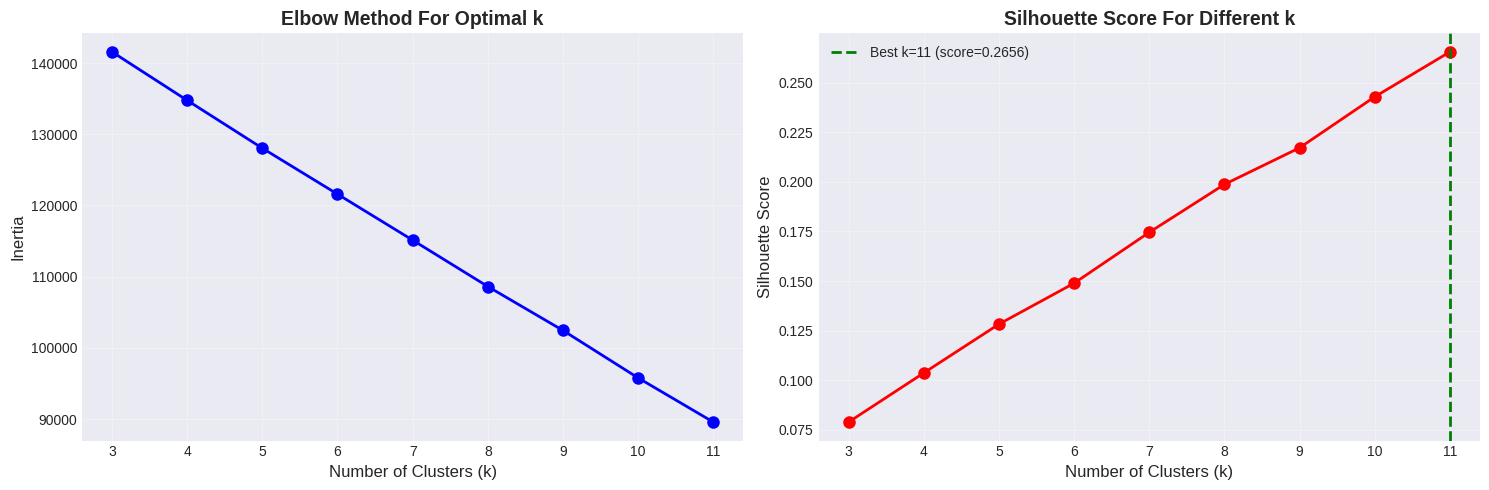


Based on Silhouette Score, optimal k = 11


In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score For Different k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

best_k_idx = np.argmax(silhouette_scores)
best_k = list(k_range)[best_k_idx]
axes[1].axvline(x=best_k, color='green', linestyle='--', linewidth=2, 
                label=f'Best k={best_k} (score={silhouette_scores[best_k_idx]:.4f})')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nBased on Silhouette Score, optimal k = {best_k}")

## 5. Apply K-Means Clustering

We'll use the optimal number of clusters or a reasonable choice (e.g., 7-8 clusters) for meaningful skill groupings.

In [ ]:

optimal_k = 10  

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
final_clusters = kmeans_final.fit_predict(skill_normalized)


df_with_clusters = df.copy()
df_with_clusters['Cluster'] = final_clusters

print(f"K-Means clustering completed with k={optimal_k}")
print(f"Final silhouette score: {silhouette_score(skill_normalized, final_clusters):.4f}")
print(f"\nCluster distribution:")
print(df_with_clusters['Cluster'].value_counts().sort_index())

K-Means clustering completed with k=10
Final silhouette score: 0.2430

Cluster distribution:
Cluster
0    2157
1     555
2    1020
3    1657
4    1015
5     555
6     555
7     555
8     555
9     555
Name: count, dtype: int64
Final silhouette score: 0.2430

Cluster distribution:
Cluster
0    2157
1     555
2    1020
3    1657
4    1015
5     555
6     555
7     555
8     555
9     555
Name: count, dtype: int64


## 6. Identify Top Skills Per Cluster

For each cluster, we'll calculate the average of row-normalized values and identify the top 2-3 skills.

In [ ]:

cluster_profiles = pd.DataFrame(skill_normalized, columns=skill_columns)
cluster_profiles['Cluster'] = final_clusters


cluster_avg_normalized = cluster_profiles.groupby('Cluster')[skill_columns].mean()

print("Average normalized skill values per cluster:")
cluster_avg_normalized

Average normalized skill values per cluster:


,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing
Cluster,,,,,,,,,,,,,,,,,
0,-0.208042,-0.190709,0.646720,-0.191359,-0.191359,0.646720,-0.191359,-0.191359,-0.186580,-0.190238,0.646720,-0.191359,0.662027,-0.191359,-0.228265,-0.225101,-0.225101
1,-0.188560,-0.215139,-0.188937,-0.227382,-0.227382,-0.188937,-0.227382,-0.227382,-0.208820,-0.215139,-0.188937,-0.227382,-0.195693,3.296328,-0.201688,-0.183785,-0.183785
2,-0.204963,1.597083,-0.196143,-0.221725,-0.221725,-0.196143,-0.221725,-0.221725,-0.208267,-0.208267,-0.196143,-0.221725,-0.203019,-0.221725,1.570327,-0.212059,-0.212059
3,0.894745,-0.181657,-0.225927,-0.208559,-0.208559,-0.225927,-0.208559,-0.208559,-0.177886,-0.181657,-0.225927,-0.208559,-0.225927,-0.208559,-0.141234,0.971642,0.971113
4,-0.205259,-0.208579,-0.199850,-0.222103,-0.222103,-0.199850,-0.222103,-0.222103,1.570002,1.604663,-0.199850,-0.222103,-0.203305,-0.222103,-0.200572,-0.212390,-0.212390
5,-0.188560,-0.215139,-0.188937,-0.227382,-0.227382,-0.188937,-0.227382,-0.227382,-0.208820,-0.215139,-0.188937,3.296328,-0.195693,-0.227382,-0.201688,-0.183785,-0.183785
6,-0.188560,-0.215139,-0.188937,-0.227382,-0.227382,-0.188937,3.296328,-0.227382,-0.208820,-0.215139,-0.188937,-0.227382,-0.195693,-0.227382,-0.201688,-0.183785,-0.183785
7,-0.188560,-0.215139,-0.188937,-0.227382,3.296328,-0.188937,-0.227382,-0.227382,-0.208820,-0.215139,-0.188937,-0.227382,-0.195693,-0.227382,-0.201688,-0.183785,-0.183785
8,-0.188560,-0.215139,-0.188937,-0.227382,-0.227382,-0.188937,-0.227382,3.296328,-0.208820,-0.215139,-0.188937,-0.227382,-0.195693,-0.227382,-0.201688,-0.183785,-0.183785


In [ ]:

top_skills_dict = {}

print("Top 3 Skills Per Cluster (based on row-normalized values):")
print("=" * 80)

for cluster_id in range(optimal_k):
    cluster_skills = cluster_avg_normalized.loc[cluster_id].sort_values(ascending=False)
    top_3_skills = cluster_skills.head(3)
    top_skills_dict[cluster_id] = top_3_skills.index.tolist()
    
    print(f"\nCluster {cluster_id}:")
    for i, (skill, value) in enumerate(top_3_skills.items(), 1):
        print(f"  {i}. {skill:40s}: {value:+.4f}")

Top 3 Skills Per Cluster (based on row-normalized values):

Cluster 0:
  1. Business Analysis                       : +0.6620
  2. AI ML                                   : +0.6467
  3. Distributed Computing Systems           : +0.6467

Cluster 1:
  1. Communication skills                    : +3.2963
  2. Graphics Designing                      : -0.1838
  3. Troubleshooting skills                  : -0.1838

Cluster 2:
  1. Computer Architecture                   : +1.5971
  2. Data Science                            : +1.5703
  3. AI ML                                   : -0.1961

Cluster 3:
  1. Troubleshooting skills                  : +0.9716
  2. Graphics Designing                      : +0.9711
  3. Database Fundamentals                   : +0.8947

Cluster 4:
  1. Technical Communication                 : +1.6047
  2. Computer Forensics Fundamentals         : +1.5700
  3. AI ML                                   : -0.1999

Cluster 5:
  1. Software Engineering                   

## 7. Assign Meaningful Names to Clusters

Based on the top skills, we'll assign descriptive names to each cluster.

In [ ]:

def generate_cluster_name(top_skills_list):
    skill_name_map = {
        'Database Fundamentals': 'Database',
        'Computer Architecture': 'Architecture',
        'Distributed Computing Systems': 'Distributed Systems',
        'Cyber Security': 'Security',
        'Software Development': 'Software Dev',
        'Programming Skills': 'Programming',
        'Project Management': 'PM',
        'Computer Forensics Fundamentals': 'Forensics',
        'Technical Communication': 'Tech Comm',
        'AI ML': 'AI/ML',
        'Software Engineering': 'Software Eng',
        'Business Analysis': 'Business Analysis',
        'Communication skills': 'Communication',
        'Troubleshooting skills': 'Troubleshooting',
        'Graphics Designing': 'Graphics',
        'Data Science': 'Data Science'
    }
    
    simplified_skills = [skill_name_map.get(skill, skill) for skill in top_skills_list[:2]]
    return ' & '.join(simplified_skills)

cluster_names = {}
for cluster_id, top_skills in top_skills_dict.items():
    cluster_names[cluster_id] = generate_cluster_name(top_skills)

print("Cluster Names:")
print("=" * 80)
for cluster_id, name in cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")

Cluster Names:
Cluster 0: Business Analysis & AI/ML
Cluster 1: Communication & Graphics
Cluster 2: Architecture & Data Science
Cluster 3: Troubleshooting & Graphics
Cluster 4: Tech Comm & Forensics
Cluster 5: Software Eng & Troubleshooting
Cluster 6: Programming & Graphics
Cluster 7: Networking & Graphics
Cluster 8: PM & Graphics
Cluster 9: Security & Graphics


## 8. Comprehensive Cluster Summary

Display complete information about each cluster: size, top skills, and names.

In [ ]:

cluster_summary = []

for cluster_id in range(optimal_k):
    cluster_mask = final_clusters == cluster_id
    cluster_size = np.sum(cluster_mask)

    top_skills_series = cluster_avg_normalized.loc[cluster_id].sort_values(ascending=False).head(3)
    top_skills_str = ', '.join([f"{skill} ({val:+.3f})" for skill, val in top_skills_series.items()])
    
    cluster_summary.append({
        'Cluster_ID': cluster_id,
        'Cluster_Name': cluster_names[cluster_id],
        'Employee_Count': cluster_size,
        'Percentage': f"{100 * cluster_size / len(df):.2f}%",
        'Top_3_Skills': top_skills_str
    })

summary_df = pd.DataFrame(cluster_summary)

print("=" * 100)
print("CLUSTER SUMMARY - SKILL COMPOSITION BASED CLUSTERING")
print("=" * 100)
print(summary_df.to_string(index=False))
print("=" * 100)

CLUSTER SUMMARY - SKILL COMPOSITION BASED CLUSTERING
 Cluster_ID                   Cluster_Name  Employee_Count Percentage                                                                                 Top_3_Skills
          0      Business Analysis & AI/ML            2157     23.50%           Business Analysis (+0.662), AI ML (+0.647), Distributed Computing Systems (+0.647)
          1       Communication & Graphics             555      6.05%  Communication skills (+3.296), Graphics Designing (-0.184), Troubleshooting skills (-0.184)
          2    Architecture & Data Science            1020     11.11%                        Computer Architecture (+1.597), Data Science (+1.570), AI ML (-0.196)
          3     Troubleshooting & Graphics            1657     18.05% Troubleshooting skills (+0.972), Graphics Designing (+0.971), Database Fundamentals (+0.895)
          4          Tech Comm & Forensics            1015     11.06%   Technical Communication (+1.605), Computer Forensics Fundame

## 9. Visualize Cluster Distribution

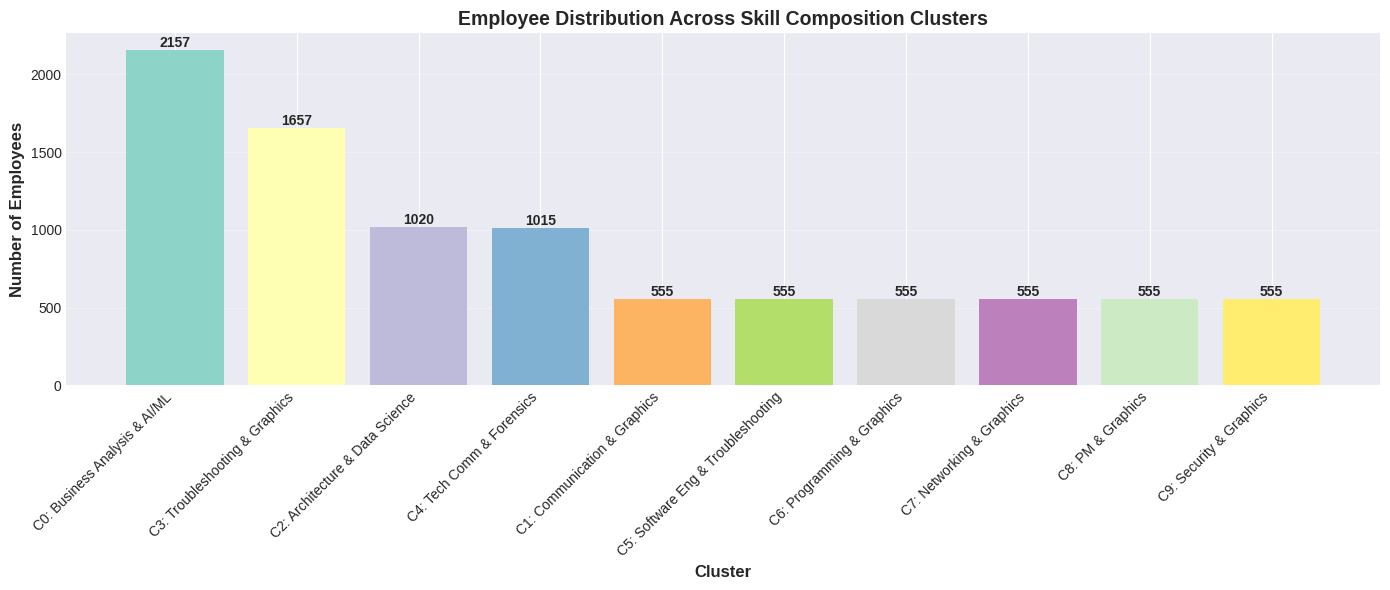

In [ ]:

fig, ax = plt.subplots(figsize=(14, 6))

cluster_counts = summary_df.sort_values('Employee_Count', ascending=False)
bars = ax.bar(range(len(cluster_counts)), cluster_counts['Employee_Count'], 
               color=plt.cm.Set3(np.linspace(0, 1, len(cluster_counts))))


ax.set_xticks(range(len(cluster_counts)))
ax.set_xticklabels([f"C{row['Cluster_ID']}: {row['Cluster_Name']}" 
                     for _, row in cluster_counts.iterrows()], 
                    rotation=45, ha='right')

ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Employees', fontsize=12, fontweight='bold')
ax.set_title('Employee Distribution Across Skill Composition Clusters', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Visualize Top Skills Per Cluster (Heatmap)

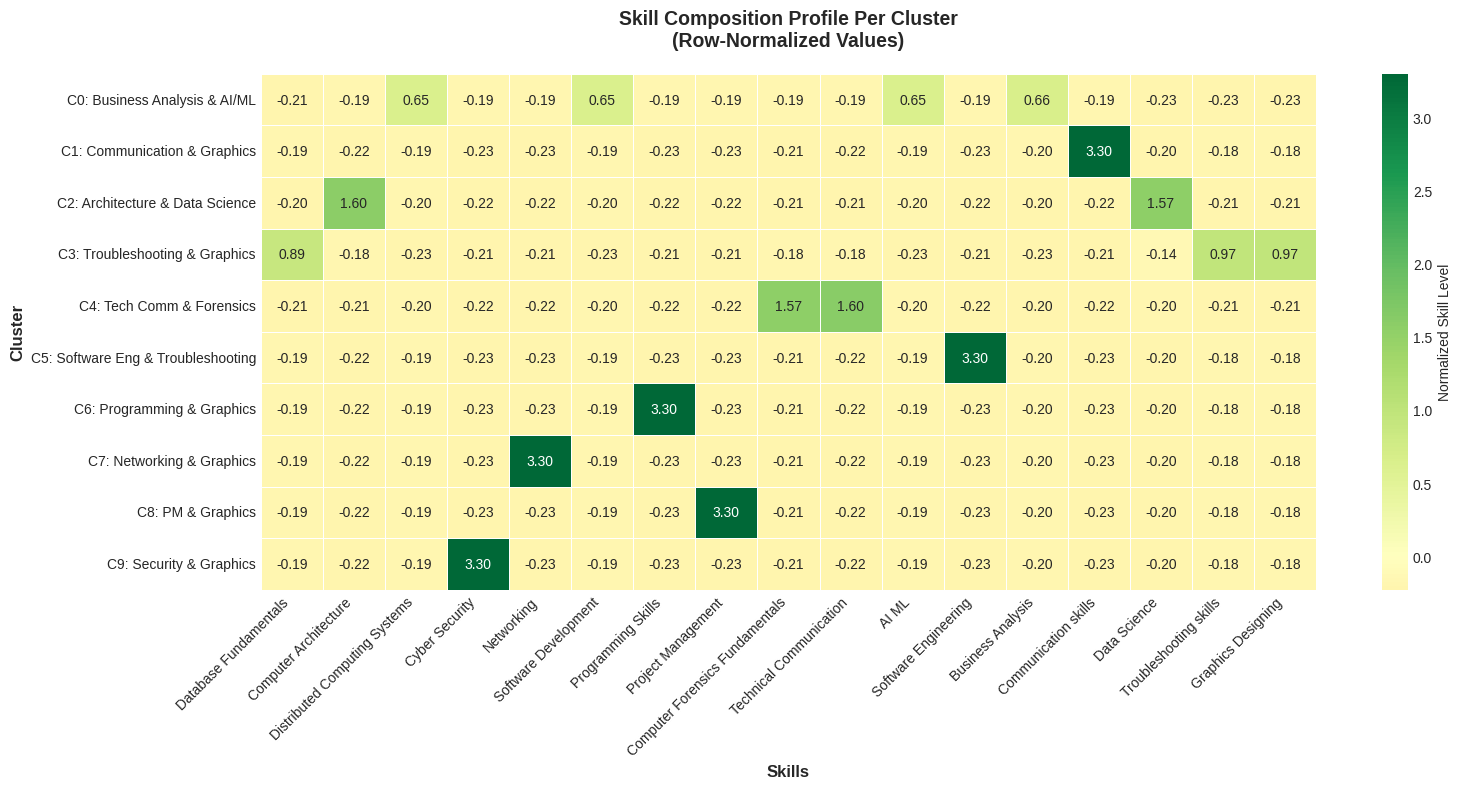

In [ ]:

fig, ax = plt.subplots(figsize=(16, 8))


cluster_avg_with_names = cluster_avg_normalized.copy()
cluster_avg_with_names.index = [f"C{i}: {cluster_names[i]}" for i in range(optimal_k)]

sns.heatmap(cluster_avg_with_names, cmap='RdYlGn', center=0, 
            annot=True, fmt='.2f', cbar_kws={'label': 'Normalized Skill Level'},
            linewidths=0.5, ax=ax)

ax.set_title('Skill Composition Profile Per Cluster\n(Row-Normalized Values)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Skills', fontsize=12, fontweight='bold')
ax.set_ylabel('Cluster', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 11. Radar Chart for Top Skills by Cluster

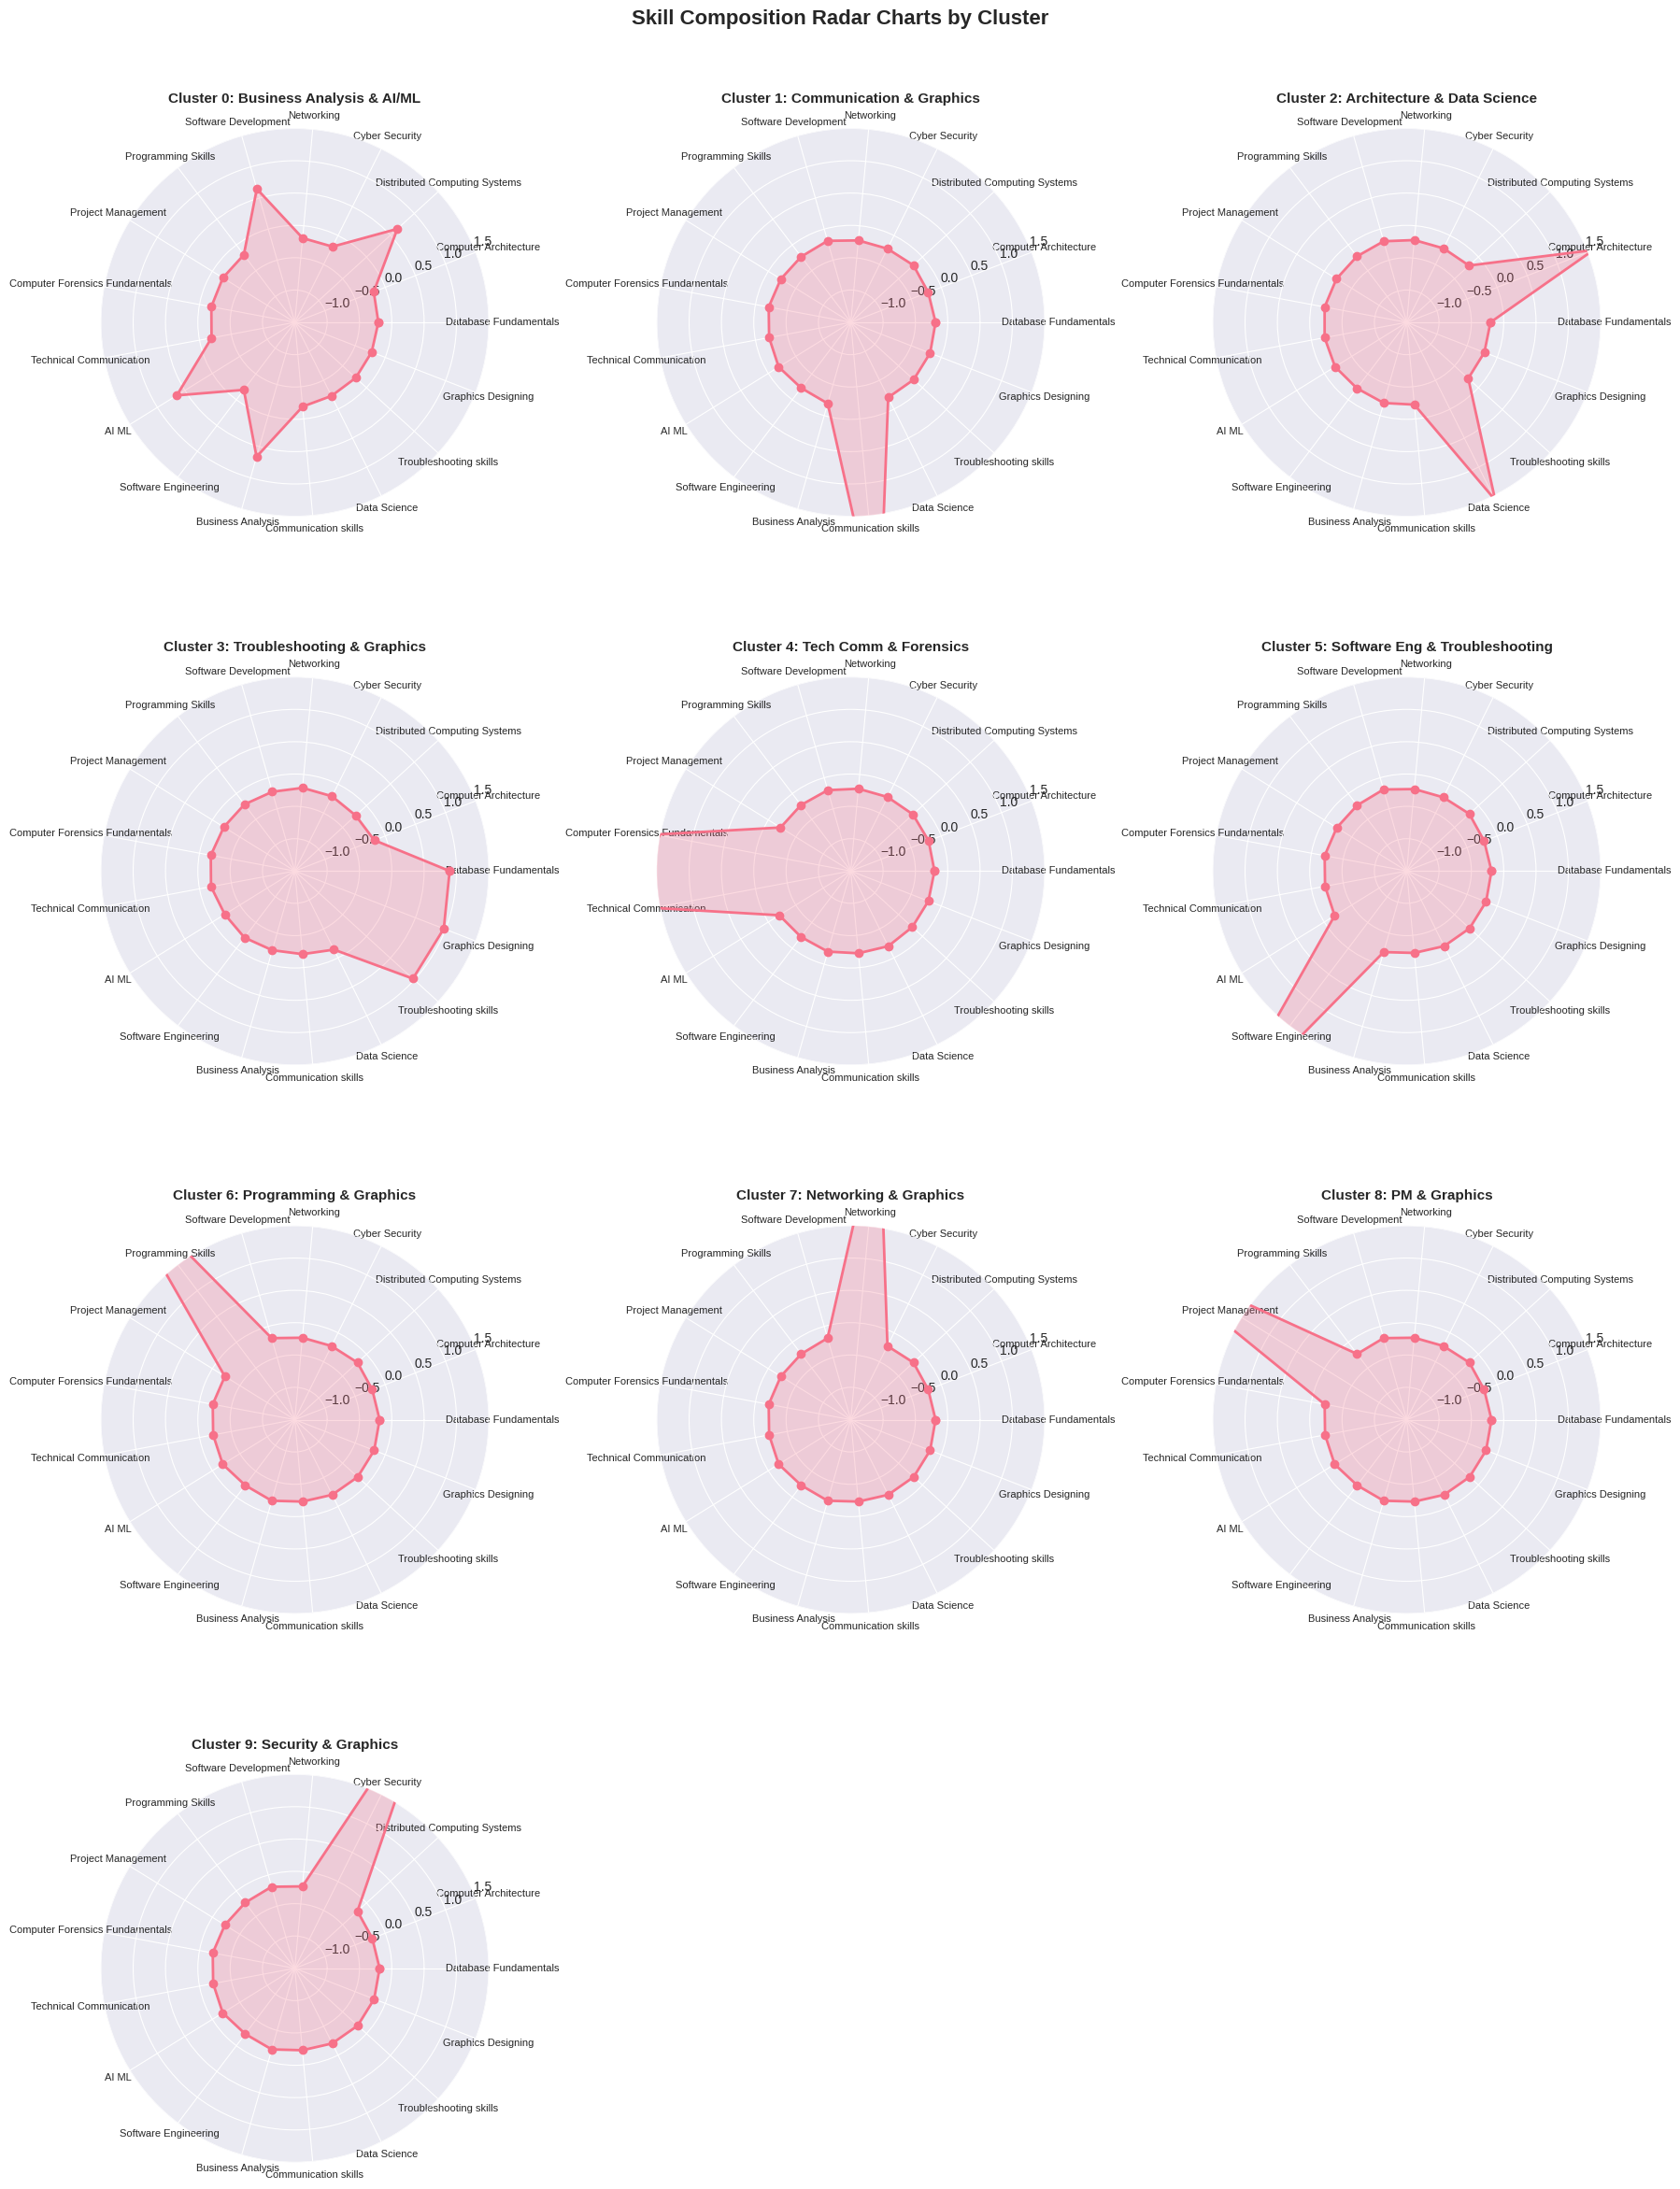

In [ ]:

def create_radar_chart(cluster_id, ax):

    skills = skill_columns
    values = cluster_avg_normalized.loc[cluster_id].values
    

    N = len(skills)
    

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    values = np.concatenate((values, [values[0]]))  
    angles += angles[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(skills, size=8)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f"Cluster {cluster_id}: {cluster_names[cluster_id]}", 
                 size=11, fontweight='bold', pad=20)
    ax.grid(True)


n_cols = 3
n_rows = (optimal_k + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), 
                         subplot_kw=dict(projection='polar'))
axes = axes.flatten() if optimal_k > 1 else [axes]

for i in range(optimal_k):
    create_radar_chart(i, axes[i])

for i in range(optimal_k, len(axes)):
    axes[i].axis('off')

plt.suptitle('Skill Composition Radar Charts by Cluster', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 12. Analyze Cluster vs. Role Distribution

Let's see how the skill-based clusters relate to actual job roles.

In [ ]:

print("=" * 100)
print("TOP ROLES PER CLUSTER")
print("=" * 100)

for cluster_id in range(optimal_k):
    cluster_mask = df_with_clusters['Cluster'] == cluster_id
    cluster_roles = df_with_clusters[cluster_mask]['Role'].value_counts().head(5)
    
    print(f"\nCluster {cluster_id}: {cluster_names[cluster_id]}")
    print(f"Total employees: {cluster_roles.sum()}")
    print("Top 5 roles:")
    for role, count in cluster_roles.items():
        percentage = 100 * count / cluster_roles.sum()
        print(f"  - {role:40s}: {count:4d} ({percentage:5.1f}%)")

TOP ROLES PER CLUSTER

Cluster 0: Business Analysis & AI/ML
Total employees: 1919
Top 5 roles:
  - AI ML Specialist                        :  487 ( 25.4%)
  - Business Analyst                        :  475 ( 24.8%)
  - Application Support Engineer            :  466 ( 24.3%)
  - Software Developer                      :  466 ( 24.3%)
  - API Specialist                          :   25 (  1.3%)

Cluster 1: Communication & Graphics
Total employees: 533
Top 5 roles:
  - Customer Service Executive              :  507 ( 95.1%)
  - AI ML Specialist                        :    9 (  1.7%)
  - Application Support Engineer            :    6 (  1.1%)
  - Software Developer                      :    6 (  1.1%)
  - Database Administrator                  :    5 (  0.9%)

Cluster 2: Architecture & Data Science
Total employees: 1019
Top 5 roles:
  - Hardware Engineer                       :  502 ( 49.3%)
  - AI ML Specialist                        :  501 ( 49.2%)
  - Software Developer                 

## 13. Save the Model and Results

In [ ]:
import pickle
import json
import os

models_dir = '../Models'
os.makedirs(models_dir, exist_ok=True)

model_path = os.path.join(models_dir, 'skill_composition_kmeans_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(kmeans_final, f)
print(f"Model saved to: {model_path}")


cluster_info = {
    'n_clusters': optimal_k,
    'cluster_names': cluster_names,
    'top_skills': top_skills_dict,
    'skill_columns': skill_columns,
    'silhouette_score': float(silhouette_score(skill_normalized, final_clusters))
}

info_path = os.path.join(models_dir, 'skill_composition_cluster_info.json')
with open(info_path, 'w') as f:
    json.dump(cluster_info, f, indent=2)
print(f"Cluster info saved to: {info_path}")

output_path = os.path.join(models_dir, 'employees_with_skill_clusters.csv')
df_with_clusters.to_csv(output_path, index=False)
print(f"Clustered data saved to: {output_path}")

print("\n✓ All outputs saved successfully!")

Model saved to: ../Models/skill_composition_kmeans_model.pkl
Cluster info saved to: ../Models/skill_composition_cluster_info.json
Clustered data saved to: ../Models/employees_with_skill_clusters.csv

✓ All outputs saved successfully!
Cluster info saved to: ../Models/skill_composition_cluster_info.json
Clustered data saved to: ../Models/employees_with_skill_clusters.csv

✓ All outputs saved successfully!


## 14. Example: Predict Cluster for a New Employee

Demonstrate how to use the model to predict the skill composition cluster for a new employee.

In [ ]:

example_employee = df.sample(1, random_state=42)
example_employee_skills = example_employee[skill_columns].values[0]

print("Example Employee Skills:")
example_employee_df = pd.DataFrame({
    'Skill': skill_columns,
    'Value': example_employee_skills
})
print(example_employee_df.to_string(index=False))

mean_val = np.mean(example_employee_skills)
std_val = np.std(example_employee_skills)
example_normalized = (example_employee_skills - mean_val) / std_val if std_val > 0 else example_employee_skills - mean_val

predicted_cluster = kmeans_final.predict(example_normalized.reshape(1, -1))[0]

print(f"\n{'='*80}")
print(f"Predicted Cluster: {predicted_cluster}")
print(f"Cluster Name: {cluster_names[predicted_cluster]}")
print(f"Top Skills for this cluster: {', '.join(top_skills_dict[predicted_cluster][:3])}")
print(f"{'='*80}")

Example Employee Skills:
                          Skill  Value
          Database Fundamentals      1
          Computer Architecture      6
  Distributed Computing Systems      1
                 Cyber Security      1
                     Networking      4
           Software Development      1
             Programming Skills      1
             Project Management      1
Computer Forensics Fundamentals      1
        Technical Communication      1
                          AI ML      1
           Software Engineering      1
              Business Analysis      1
           Communication skills      1
                   Data Science      1
         Troubleshooting skills      1
             Graphics Designing      1

Predicted Cluster: 2
Cluster Name: Architecture & Data Science
Top Skills for this cluster: Computer Architecture, Data Science, AI ML


## 15. Key Insights and Summary

### What This Model Does:
1. **Row-wise normalization** ensures we focus on the **pattern** of skills (relative strengths) rather than absolute skill levels
2. Each cluster represents a distinct **skill composition** - a unique combination of skills that employees tend to excel in
3. Employees in the same cluster have similar skill profiles, even if their absolute skill values differ

### Business Applications:
- **Team Formation**: Build balanced teams by combining employees from different skill composition clusters
- **Training Programs**: Design targeted training based on cluster-specific skill gaps
- **Career Paths**: Identify natural career progression paths between clusters
- **Recruitment**: Match job requirements to specific skill composition clusters
- **Skill Development**: Help employees understand their skill profile and development opportunities

In [ ]:

print("="*100)
print("FINAL MODEL SUMMARY")
print("="*100)
print(f"\n✓ Model Type: K-Means Clustering (Skill Composition Based)")
print(f"✓ Number of Clusters: {optimal_k}")
print(f"✓ Silhouette Score: {silhouette_score(skill_normalized, final_clusters):.4f}")
print(f"✓ Total Employees: {len(df)}")
print(f"✓ Number of Skills: {len(skill_columns)}")
print(f"\n✓ Normalization Method: Row-wise StandardScaler")
print(f"  - Each employee's skills are normalized relative to their own profile")
print(f"  - Focuses on skill composition patterns, not absolute skill levels")

print(f"\n✓ Model Files Saved:")
print(f"  - {model_path}")
print(f"  - {info_path}")
print(f"  - {output_path}")

print("\n" + "="*100)
print("CLUSTER NAMES:")
for cid, cname in cluster_names.items():
    count = (final_clusters == cid).sum()
    pct = 100 * count / len(df)
    print(f"  Cluster {cid}: {cname:35s} ({count:4d} employees, {pct:5.1f}%)")
print("="*100)

FINAL MODEL SUMMARY

✓ Model Type: K-Means Clustering (Skill Composition Based)
✓ Number of Clusters: 10


✓ Silhouette Score: 0.2430
✓ Total Employees: 9179
✓ Number of Skills: 17

✓ Normalization Method: Row-wise StandardScaler
  - Each employee's skills are normalized relative to their own profile
  - Focuses on skill composition patterns, not absolute skill levels

✓ Model Files Saved:
  - ../Models/skill_composition_kmeans_model.pkl
  - ../Models/skill_composition_cluster_info.json
  - ../Models/employees_with_skill_clusters.csv

CLUSTER NAMES:
  Cluster 0: Business Analysis & AI/ML           (2157 employees,  23.5%)
  Cluster 1: Communication & Graphics            ( 555 employees,   6.0%)
  Cluster 2: Architecture & Data Science         (1020 employees,  11.1%)
  Cluster 3: Troubleshooting & Graphics          (1657 employees,  18.1%)
  Cluster 4: Tech Comm & Forensics               (1015 employees,  11.1%)
  Cluster 5: Software Eng & Troubleshooting      ( 555 employees,   6.0%)
  Cluster 6: Programming & Graphics              ( 555 employees,   6.0%)
  Cluster 7: Networking & Graphic